![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías

#!pip install livelossplot

import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics

In [ ]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


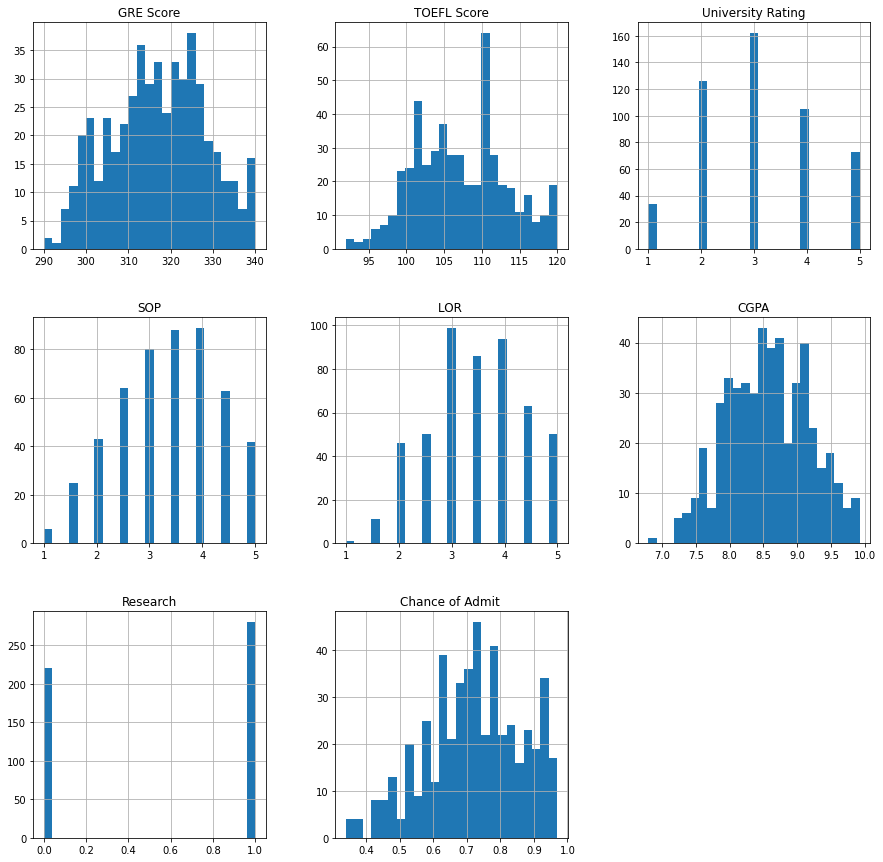

In [ ]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [ ]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Definición de dimensiones de salida, varaibles de interés
output_var = 1
print(output_var, ' output variables')

# Definición de dimensiones de entrada, varaibles predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


In [ ]:
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
xTrain_norm = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest_norm = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


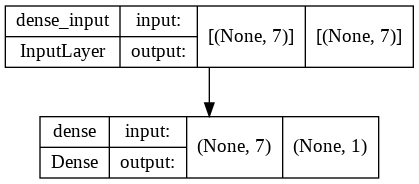

In [ ]:
# Celda 1
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())


In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

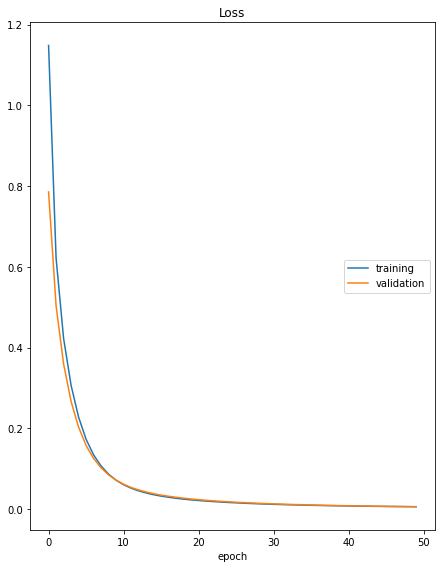

Loss
	training         	 (min:    0.006, max:    1.148, cur:    0.006)
	validation       	 (min:    0.006, max:    0.786, cur:    0.006)
11/11 [==============================] - 0s 30ms/step - loss: 0.0060 - val_loss: 0.0062


In [ ]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain_norm, yTrain, 
          verbose=1, 
          epochs=50,
          validation_data=(xTest_norm, yTest),
          callbacks=[PlotLossesKeras()])

In [ ]:

y_predict = model.predict(xTest_norm).ravel()
print(f'MSE: {mean_squared_error(yTest, y_predict)}')
print(f'MAE: {mean_absolute_error(yTest, y_predict)}')
m1 = mean_squared_error(yTest, y_predict)

MSE: 0.006214489705881401
MAE: 0.06012988916238149


Justificación de la selección:

Función de pérdida: dado que el caso es un problema equivalente a una regresión donde las etiquetas son valores continuos, se busca que el error cuadrático medio (MSE), entendido como la distancia entre el valor real y el predicho, sea lo más pequeña posible, optimizando así la función de pérdida del modelo.

Optimizador: Stochastic Gradient Descent es un algoritmo iterativo para descender en la pendiente de la función de costo y alcanzar el punto más bajo de la función. Se usa por ser más rápido que el Gradient Descent completo.

Número de épocas: se considera que hasta 50 ejecuciones de los algoritmos de forwardpropagation y backpropagation no hay cambios significativos en la pérdida (menor a 0.5%).

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


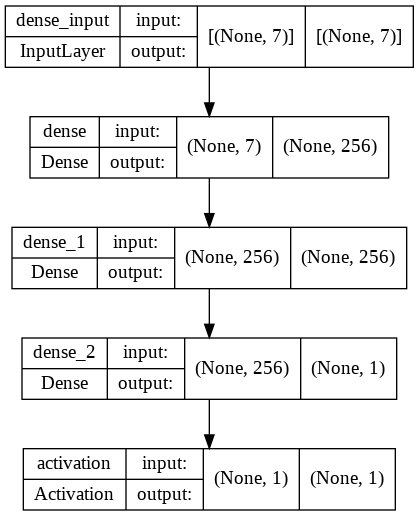

In [ ]:
# Celda 2

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())


In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

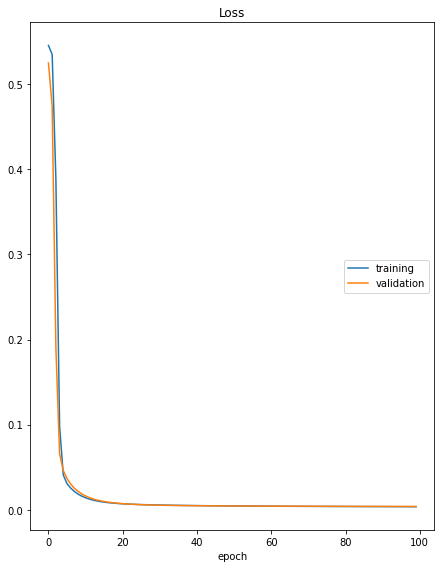

Loss
	training         	 (min:    0.004, max:    0.546, cur:    0.004)
	validation       	 (min:    0.004, max:    0.525, cur:    0.004)
11/11 [==============================] - 0s 31ms/step - loss: 0.0036 - val_loss: 0.0039


In [ ]:
model.fit(xTrain_norm, yTrain, 
          verbose=1, 
          epochs=100,
          validation_data=(xTest_norm, yTest),
          callbacks=[PlotLossesKeras()])

In [ ]:
y_predict = model.predict(xTest_norm).ravel()
print(f'MSE: {mean_squared_error(yTest, y_predict)}')
print(f'MAE: {mean_absolute_error(yTest, y_predict)}')
m2 = mean_squared_error(yTest, y_predict)

MSE: 0.003910682650197245
MAE: 0.04814480817317963


Justificación de la selección:

Función de pérdida: dado que el caso es un problema equivalente a una regresión donde las etiquetas son valores continuos, se busca que el error cuadrático medio (MSE), entendido como la distancia entre el valor real y el predicho, sea lo más pequeña posible, optimizando así la función de pérdida del modelo.

Optimizador: Stochastic Gradient Descent es un algoritmo iterativo para descender en la pendiente de la función de costo y alcanzar el punto más bajo de la función. Se usa por ser más rápido que el Gradient Descent completo.

Número de épocas: se considera que hasta 100 ejecuciones de los algoritmos de forwardpropagation y backpropagation no hay cambios significativos en la pérdida (menor a 0.5%).

Número de neuronas: por simplicidad se utiliza la misma cantidad de neuronas en las 2 capas utilizadas. Se eligió 256 porque nos dio mejor resultado en las pruebas.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


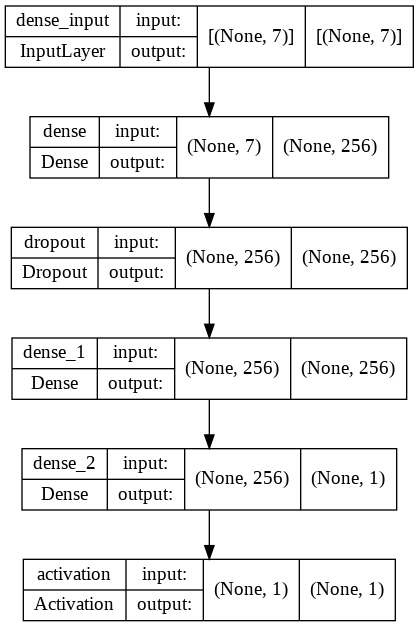

In [ ]:
# Celda 3

from keras.callbacks import EarlyStopping, ModelCheckpoint

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims

model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())


In [ ]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1) 

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

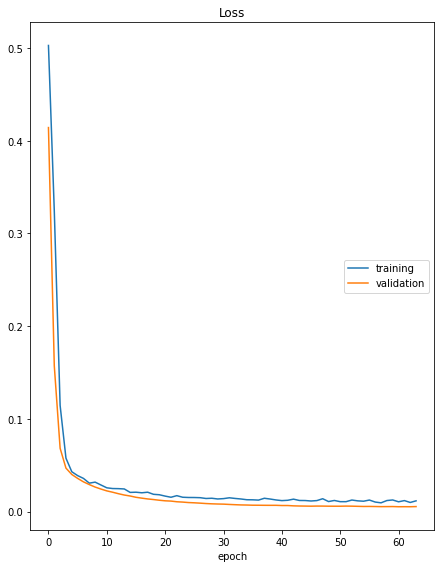

Loss
	training         	 (min:    0.009, max:    0.503, cur:    0.012)
	validation       	 (min:    0.005, max:    0.414, cur:    0.005)
6/6 [==============================] - 0s 61ms/step - loss: 0.0116 - val_loss: 0.0054
Epoch 64: early stopping


In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xTrain_norm, yTrain, 
          verbose=True, 
          epochs=100,
          batch_size=64,
          validation_data=(xTest_norm, yTest),
          callbacks=[PlotLossesKeras(), best_model, early_stop])


In [ ]:
y_predict = model.predict(xTest_norm).ravel()
print(f'MSE: {mean_squared_error(yTest, y_predict)}')
print(f'MAE: {mean_absolute_error(yTest, y_predict)}')
m3 = mean_squared_error(yTest, y_predict)

MSE: 0.005397094366400017
MAE: 0.058009475803375246


Justificación de la selección:

Función de pérdida: dado que el caso es un problema equivalente a una regresión donde las etiquetas son valores continuos, se busca que el error cuadrático medio (MSE), entendido como la distancia entre el valor real y el predicho, sea lo más pequeña posible, optimizando así la función de pérdida del modelo.

Optimizador: Stochastic Gradient Descent es un algoritmo iterativo para descender en la pendiente de la función de costo y alcanzar el punto más bajo de la función. Se usa por ser más rápido que el Gradient Descent completo.

Número de épocas: se considera que hasta 100 ejecuciones de los algoritmos de forwardpropagation y backpropagation no hay cambios significativos en la pérdida (menor a 0.5%).

Número de neuronas: por simplicidad se utiliza la misma cantidad de neuronas en las 2 capas utilizadas. Se eligió 256 porque nos dio mejor resultado en las pruebas.

Early stopping: con el objetivo de evitar overfitting, se utiliza un parámetro "patience" igual a 3, lo cual indica que el algoritmo detiene su ejecución (entrenamiento) cuando la pérdida en validación no haya mejorado después de tres épocas.

Dropout: es una capa de regularización para evitar el sobreajuste, establece una fracción de unidades 0 en cada actualización durante la fase de entrenamiento. Se agrega la capa de dropout entre las 2 capas ocultas y utilizando un 20%, lo cual indica que por cada nueva entrada a la red, se desactivará un porcentaje de las neuronas en cada capa oculta con un 20% de probabilidad.


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

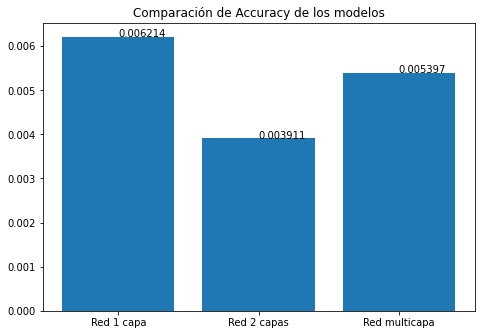

In [ ]:
# Celda 4
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de MSE de los modelos")
ejeX = ['Red 1 capa' ,'Red 2 capas', 'Red multicapa']
ejeY = np.round([m1,m2,m3],6)
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

De acuerdo con los modelos estimados, se pudo observar que aquel con el mejor desempeño es la red neuronal con 2 capas ocultas y sin dropout y early stopping. Su principal ventaja es que obtiene tiene un mejor poder predictivo (menor MSE), su desventaja es su complejidad e interpretabilidad, además que es más difícil de entrenar y de ajustar sus hiperparametros.

Por otro lado, el peor desempeño se obtuvo usando solo una neurona, la desventaja es que solo reproduce relaciones lineales (no tiene componente no-lineal), entonces su desempeño es similar a una regresión lineal.